# Moutain Bike Project

A small-data analysis project to explore and visualize ride data and make predictions about future mountain bike rides.

![trail](trail_bike.png)

To do:  

Exploratory Analysis:  
Distributions of individual variables, boxplots, histograms, identify trends

Explore correlations:  
Hypothesis test for correlations  
Explore predictive model for average speed, ride time

**Imports and setup**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
sns.reset_defaults
sns.set_style(style='darkgrid')

The data is stored in two csv files, one for each bike. This makes it easy to add new ride data to csv file and reimport to keep everything up to date.

HH2 is a traditional mountain bike; Espark is an electric pedal-assist mountian bike. 

In [54]:
mtb_df = pd.read_csv('mtb.csv', index_col='date')
emtb_df = pd.read_csv('emtb.csv', index_col='date')
mtb = pd.concat([mtb_df, emtb_df], sort=True)
mtb.sort_index(inplace=True)
mtb.head()

,bike,dist,minutes,vft
date,,,,
2017-10-15,HH2,6.2,64,874
2017-10-21,HH2,12.8,117,1191
2017-10-30,HH2,19.3,163,1856
2017-10-7,HH2,8.7,87,1257
2017-11-11,HH2,19.4,159,1882


Capitalize the name of the ebike to standardize format.  
Encode bike into dummy variable for analysis.

In [55]:
c = lambda x: x.capitalize() if x=='espark' else x
mtb['bike'] = mtb['bike'].apply(c)

In [56]:
mtb['HH2'] = pd.get_dummies(mtb['bike'], drop_first=True)
mtb.sample(5)

,bike,dist,minutes,vft,HH2
date,,,,,
2017-10-7,HH2,8.7,87,1257,1
2018-6-10,Espark,18.5,135,2851,0
2018-6-30,Espark,21.8,156,3880,0
2018-6-8,Espark,8.0,110,1888,0
2018-1-7,HH2,12.9,159,2477,1


Add columns for variables of interest.

In [57]:
mtb['vft_per_mi'] = mtb['vft'] / mtb['dist']
mtb['avg_spd'] = mtb['dist'] / (mtb['minutes'] / 60)
mtb['min_per_mile'] = mtb['minutes'] / mtb['dist']
mtb['min_per_vft'] = mtb['minutes'] / mtb['vft']
mtb.sample(5)

,bike,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,,
2017-12-9,HH2,26.00,238,3454,1,132.846154,6.554622,9.153846,0.068906
2018-4-3,Espark,19.43,116,2095,0,107.822954,10.050000,5.970149,0.055370
2018-4-8,Espark,7.94,80,1418,0,178.589421,5.955000,10.075567,0.056417
2017-12-28,HH2,5.70,64,778,1,136.491228,5.343750,11.228070,0.082262
2018-2-16,Espark,21.05,145,4204,0,199.714964,8.710345,6.888361,0.034491


Get a sense of the data with the describe() and corr() methods.

In [58]:
mtb.describe()

,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft
count,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,15.02875,126.666667,2397.958333,0.375000,159.359877,7.364186,8.592604,0.057486
std,5.23887,47.514537,1037.119045,0.489246,37.154785,1.822734,1.956920,0.021417
min,5.70000,52.000000,529.000000,0.000000,64.117647,4.363636,4.090909,0.027012
25%,10.75250,80.000000,1764.750000,0.000000,141.733164,6.015517,7.116873,0.042058
50%,15.35500,122.000000,2206.000000,0.000000,161.396605,7.190705,8.344802,0.051436
75%,18.70000,157.500000,3128.250000,1.000000,181.269037,8.430678,9.974227,0.068846
max,26.00000,238.000000,5479.000000,1.000000,247.918552,14.666667,13.750000,0.142202


In [59]:
mtb.corr()

,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft
dist,1.000000,0.815152,0.822009,-0.057589,0.015628,0.195321,-0.245997,-0.131234
minutes,0.815152,1.000000,0.653684,0.322174,0.033910,-0.366405,0.327493,0.183611
vft,0.822009,0.653684,1.000000,-0.323013,0.547270,0.152677,-0.181406,-0.514139
HH2,-0.057589,0.322174,-0.323013,1.000000,-0.518353,-0.563034,0.594920,0.784700
vft_per_mi,0.015628,0.033910,0.547270,-0.518353,1.000000,-0.079834,0.126564,-0.729419
avg_spd,0.195321,-0.366405,0.152677,-0.563034,-0.079834,1.000000,-0.938413,-0.512869
min_per_mile,-0.245997,0.327493,-0.181406,0.594920,0.126564,-0.938413,1.000000,0.485265
min_per_vft,-0.131234,0.183611,-0.514139,0.784700,-0.729419,-0.512869,0.485265,1.000000


## Exploratory Data Analysis through Visualization

In [60]:
sns.set_context(context='talk')

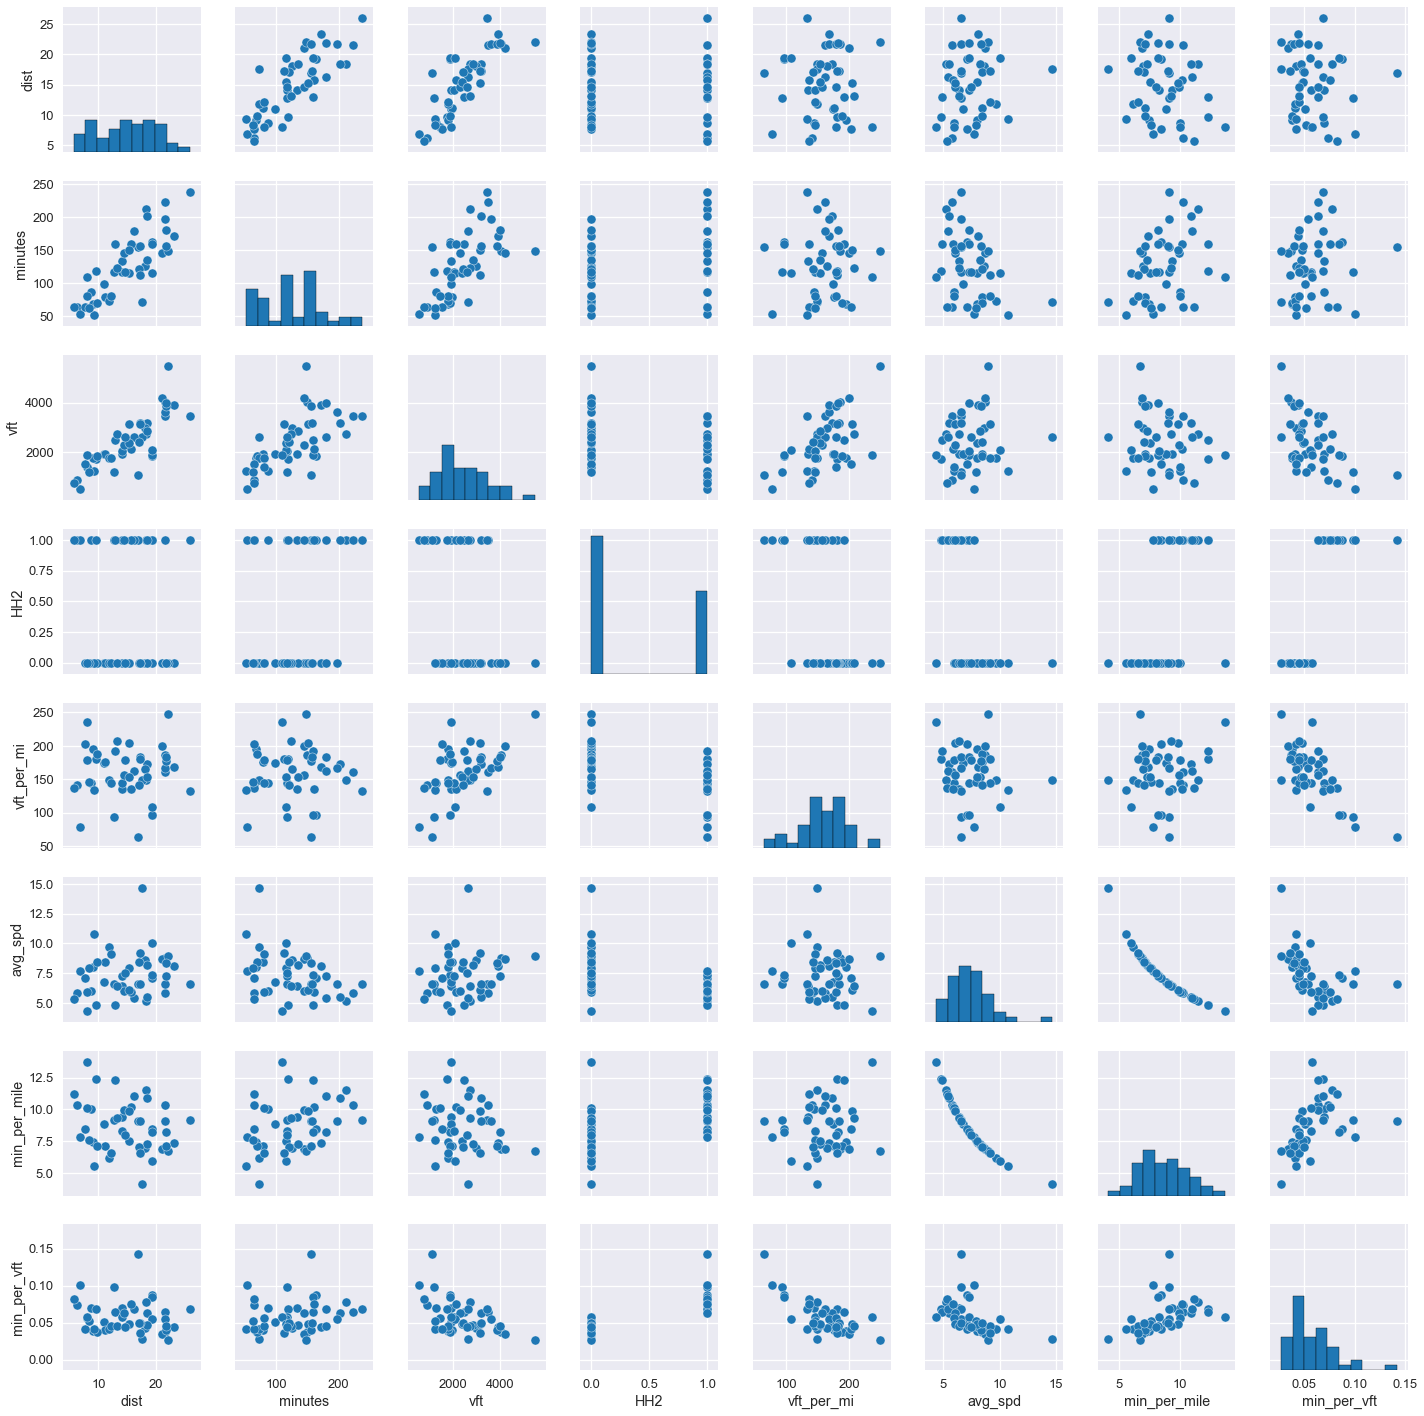

In [61]:
sns.pairplot(data=mtb)

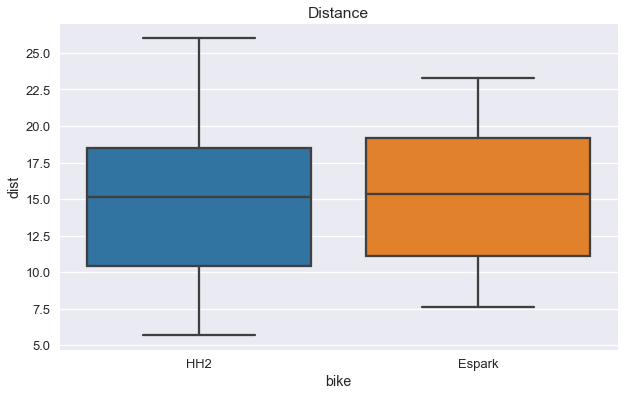

In [62]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='dist', data=mtb)
plt.title('Distance')
plt.show()

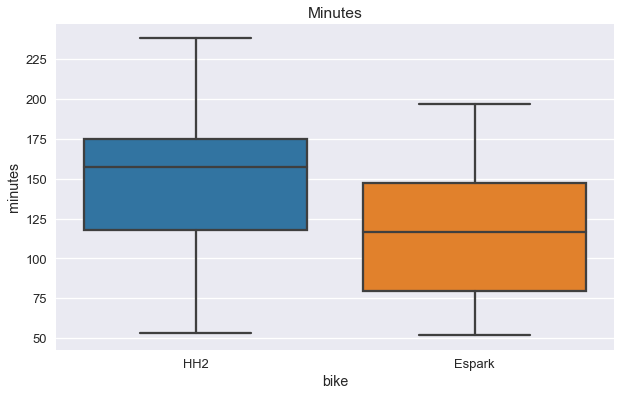

In [63]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='minutes', data=mtb)
plt.title('Minutes')
plt.show()

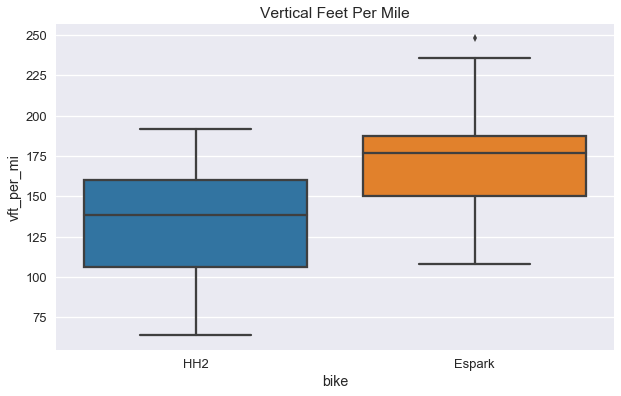

In [64]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='vft_per_mi', data=mtb)
plt.title('Vertical Feet Per Mile')
plt.show()

##### Interesting. Distances tend to be the same. However, with the ebike the rides tend to be shorter and steeper.

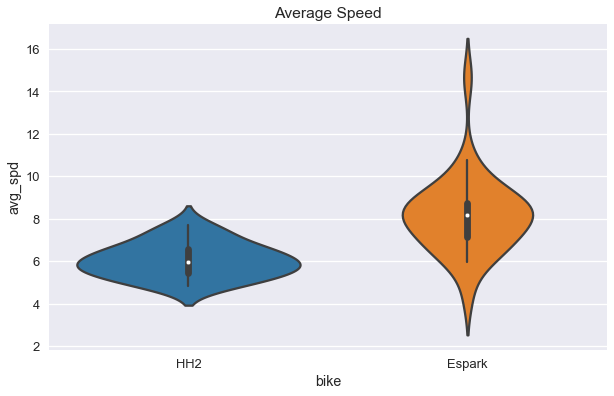

In [65]:
plt.figure(figsize=[10,6])
ax = sns.violinplot(x='bike', y='avg_spd', data=mtb)
plt.title('Average Speed')
plt.show()

##### No surprise here: average speeds are faster and have more variance with the ebike

# Easy and Hard Rides

Let's take a look at the easiest and hardest rides, defined as those with more extreme values for distance and vertical feet.

In [66]:
easy_rides = mtb[(mtb['dist']<=(mtb['dist'].quantile(0.25))) & (mtb['vft']<=(mtb['vft'].quantile(0.25)))]
easy_rides

,bike,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,,
2017-10-15,HH2,6.20,64,874,1,140.967742,5.812500,10.322581,0.073227
2017-10-7,HH2,8.70,87,1257,1,144.482759,6.000000,10.000000,0.069212
2017-11-8,HH2,9.60,119,1729,1,180.104167,4.840336,12.395833,0.068826
2017-12-24,HH2,6.80,53,529,1,77.794118,7.698113,7.794118,0.100189
2017-12-28,HH2,5.70,64,778,1,136.491228,5.343750,11.228070,0.082262
2018-3-12,Espark,9.32,52,1245,0,133.583691,10.753846,5.579399,0.041767
2018-4-8,Espark,7.94,80,1418,0,178.589421,5.955000,10.075567,0.056417
2018-6-16,Espark,7.60,64,1538,0,202.368421,7.125000,8.421053,0.041612
2018-6-3,Espark,8.30,63,1213,0,146.144578,7.904762,7.590361,0.051937


In [67]:
hard_rides = mtb[(mtb['dist']>=(mtb['dist'].quantile(0.75))) & (mtb['vft']>=(mtb['vft'].quantile(0.75)))]
hard_rides

,bike,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,,
2017-12-17,HH2,21.60,223,3475,1,160.879630,5.811659,10.324074,0.064173
2017-12-9,HH2,26.00,238,3454,1,132.846154,6.554622,9.153846,0.068906
2018-1-20,Espark,21.70,149,4028,0,185.622120,8.738255,6.866359,0.036991
2018-1-28,Espark,21.68,197,3627,0,167.297048,6.603046,9.086716,0.054315
2018-2-11,Espark,23.30,172,3909,0,167.768240,8.127907,7.381974,0.044001
2018-2-16,Espark,21.05,145,4204,0,199.714964,8.710345,6.888361,0.034491
2018-6-21,Espark,22.10,148,5479,0,247.918552,8.959459,6.696833,0.027012
2018-6-30,Espark,21.80,156,3880,0,177.981651,8.384615,7.155963,0.040206
2018-7-7,Espark,21.90,180,4000,0,182.648402,7.300000,8.219178,0.045000


Let's add these categories back to the original dataframe and create a dummy variable to facilitate comparisons.

In [68]:
mtb.loc[(mtb['dist']<=(mtb['dist'].quantile(0.25))) & 
        (mtb['vft']<=(mtb['vft'].quantile(0.25))), 'category'] = 'easy'
mtb.loc[(mtb['dist']>=(mtb['dist'].quantile(0.75))) & 
        (mtb['vft']>=(mtb['vft'].quantile(0.75))), 'category'] = 'hard'
mtb.fillna(value='medium', inplace=True)

In [69]:
def cat_num(cat):
    if cat == 'easy':
        return 0
    elif cat == 'medium':
        return 1
    else:
        return 2

In [70]:
mtb['category_num'] = mtb['category'].apply(cat_num)
mtb.sample(10)

,bike,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft,category,category_num
date,,,,,,,,,,,
2017-11-5,HH2,14.20,133,1913,1,134.718310,6.406015,9.366197,0.069524,medium,1
2018-2-16,Espark,21.05,145,4204,0,199.714964,8.710345,6.888361,0.034491,hard,2
2018-8-11,Espark,17.30,113,3128,0,180.809249,9.185841,6.531792,0.036125,medium,1
2018-6-30,Espark,21.80,156,3880,0,177.981651,8.384615,7.155963,0.040206,hard,2
2018-1-21,Espark,11.06,98,1924,0,173.960217,6.771429,8.860759,0.050936,medium,1
2017-11-24,HH2,17.00,155,1090,1,64.117647,6.580645,9.117647,0.142202,medium,1
2018-2-14,Espark,9.83,70,1849,0,188.097660,8.425714,7.121058,0.037858,medium,1
2018-7-22,Espark,17.30,157,3183,0,183.988439,6.611465,9.075145,0.049325,medium,1
2018-4-3,Espark,19.43,116,2095,0,107.822954,10.050000,5.970149,0.055370,medium,1


In [71]:
mtb['category'].value_counts()

medium    30
easy       9
hard       9
Name: category, dtype: int64

Let's visualize the rides by category to compare the difference.

Text(0.5,1,'Distance by Category')

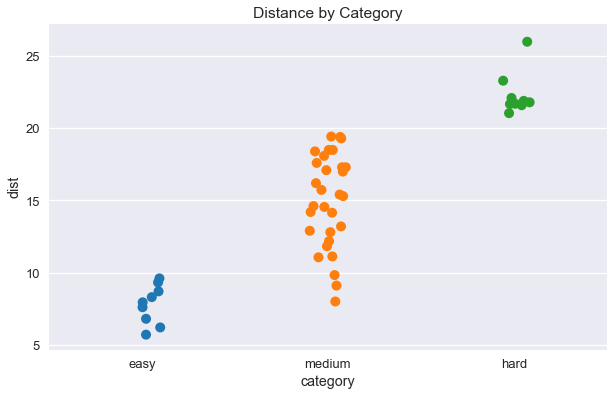

In [72]:
plt.figure(figsize=[10,6])
ax = sns.stripplot(x='category', y='dist', data=mtb, jitter=True, size=10)
plt.title('Distance by Category')

Text(0.5,1,'Vertical Feet by Category')

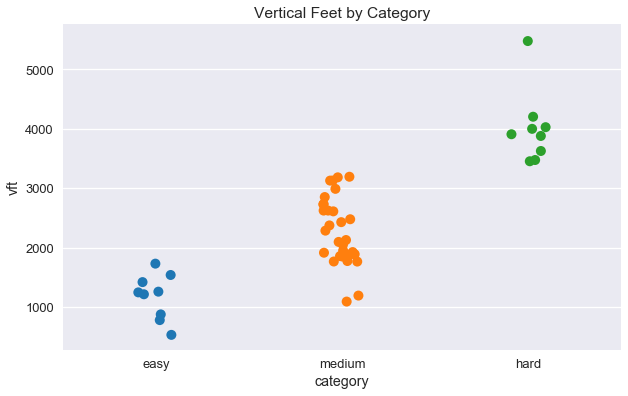

In [73]:
plt.figure(figsize=[10,6])
ax = sns.stripplot(x='category', y='vft', data=mtb, jitter=True, size=10)
plt.title('Vertical Feet by Category')

Now let's look at a correlation heat map to see which variables may be correlated.

In [74]:
mtb.corr()

,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft,category_num
dist,1.000000,0.815152,0.822009,-0.057589,0.015628,0.195321,-0.245997,-0.131234,0.859506
minutes,0.815152,1.000000,0.653684,0.322174,0.033910,-0.366405,0.327493,0.183611,0.696087
vft,0.822009,0.653684,1.000000,-0.323013,0.547270,0.152677,-0.181406,-0.514139,0.844501
HH2,-0.057589,0.322174,-0.323013,1.000000,-0.518353,-0.563034,0.594920,0.784700,-0.210819
vft_per_mi,0.015628,0.033910,0.547270,-0.518353,1.000000,-0.079834,0.126564,-0.729419,0.261085
avg_spd,0.195321,-0.366405,0.152677,-0.563034,-0.079834,1.000000,-0.938413,-0.512869,0.146306
min_per_mile,-0.245997,0.327493,-0.181406,0.594920,0.126564,-0.938413,1.000000,0.485265,-0.204390
min_per_vft,-0.131234,0.183611,-0.514139,0.784700,-0.729419,-0.512869,0.485265,1.000000,-0.273477
category_num,0.859506,0.696087,0.844501,-0.210819,0.261085,0.146306,-0.204390,-0.273477,1.000000


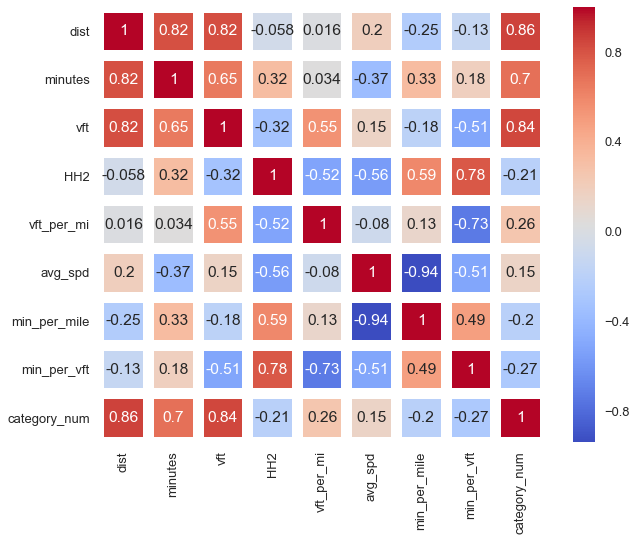

In [75]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(mtb.corr(), cmap='coolwarm', linecolor='white', linewidth=10, annot=True)

For trying to predict performance via average speed, the correlations look pretty weak when looking at all rides (except minutes per mile, which is simply another way of measuring speed). This makes sense given the differences between a traditional mountain bike and an ebike. With the ebike there are simply too many confouding variables (use of the motor, riding partners, technical difficulty of the terrain). Let's look at just the rides with the traditional bike. We can return to the entire dataframe to try and build a model to predict ride time (minutes).

In [76]:
mtb[mtb['bike']=='HH2'].corr()

,dist,minutes,vft,HH2,vft_per_mi,avg_spd,min_per_mile,min_per_vft,category_num
dist,1.000000,0.941771,0.807719,NaN,-0.017202,0.161429,-0.194526,-0.069337,0.920398
minutes,0.941771,1.000000,0.924921,NaN,0.261136,-0.154191,0.124329,-0.230436,0.888718
vft,0.807719,0.924921,1.000000,NaN,0.549777,-0.320567,0.291109,-0.559365,0.803853
HH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vft_per_mi,-0.017202,0.261136,0.549777,NaN,1.000000,-0.854139,0.849620,-0.850191,0.048129
avg_spd,0.161429,-0.154191,-0.320567,NaN,-0.854139,1.000000,-0.990049,0.507777,0.097098
min_per_mile,-0.194526,0.124329,0.291109,NaN,0.849620,-0.990049,1.000000,-0.493508,-0.144364
min_per_vft,-0.069337,-0.230436,-0.559365,NaN,-0.850191,0.507777,-0.493508,1.000000,-0.116413
category_num,0.920398,0.888718,0.803853,NaN,0.048129,0.097098,-0.144364,-0.116413,1.000000


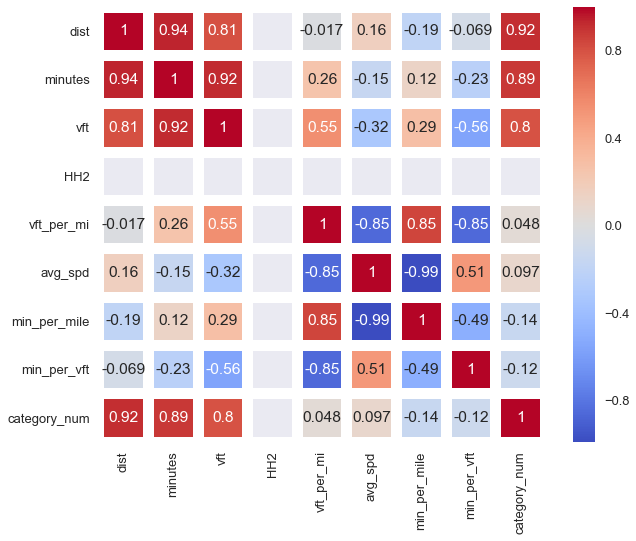

In [77]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(mtb[mtb['bike']=='HH2'].corr(), cmap='coolwarm', linecolor='white', linewidth=10, annot=True)

That's a bit better for predicting is performance as represented by average speed. Given distance and vertical feet of climbing. Vertical feet per mile is strongly correlated with average speed (-0.85), suggesting a simple linear model my work well.

I would have suspected that distance would also correlate with average speed. On a short ride I can go all-out from the beginning, whereas on a long ride I tend to try and conserve some energy. However with a correlation coefficient of 0.16 there is only a weak correlation, suggesting that ride distance does not affect average speed very much.

** Let's look at some scatterplots to see if vertical feet per mile correlates wtih average speed for each bike. **

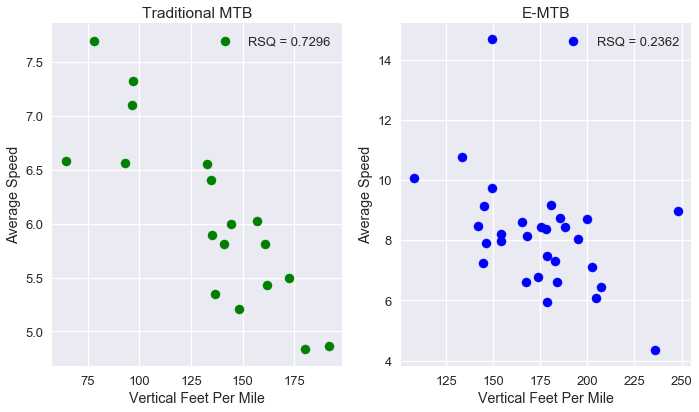

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
axes[0].scatter(mtb[mtb['bike']=='HH2']['vft_per_mi'], mtb[mtb['bike']=='HH2']['avg_spd'], 
        color = 'green', label='RSQ = ' + str(np.round(((np.corrcoef(mtb[mtb['bike']=='HH2']['avg_spd'], 
        mtb[mtb['bike']=='HH2']['vft_per_mi']))**2)[0,1], decimals = 4)))
axes[0].set_title('Traditional MTB')
axes[0].set_xlabel('Vertical Feet Per Mile')
axes[0].set_ylabel('Average Speed')
axes[1].scatter(mtb[mtb['bike']=='Espark']['vft_per_mi'], mtb[mtb['bike']=='Espark']['avg_spd'], 
        color = 'blue', label='RSQ = ' + str(np.round(((np.corrcoef(mtb[mtb['bike']=='Espark']['avg_spd'], 
        mtb[mtb['bike']=='Espark']['vft_per_mi']))**2)[0,1], decimals = 4)))
axes[1].set_title('E-MTB')
axes[1].set_xlabel('Vertical Feet Per Mile')
axes[1].set_ylabel('Average Speed')
axes[0].legend()
axes[1].legend()
plt.tight_layout()

The r-squared values tell the story. The prediction for average speed based on vertical feer per mile is about 73% better than using the mean for the traditional bike. For the ebike the coeficient of determination is rather low, indicating thast the prediction for average speed is only about 24% better than the mean.

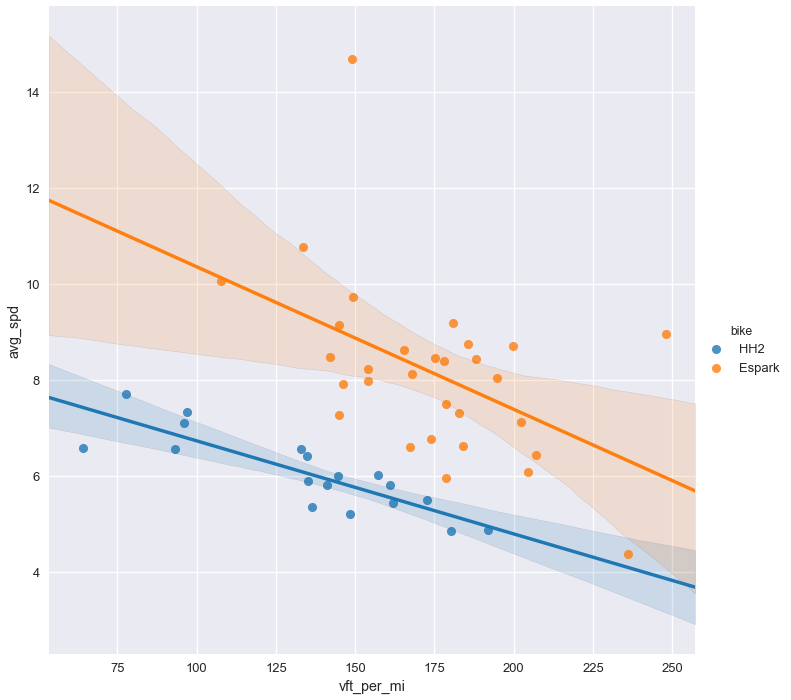

In [79]:
ax = sns.lmplot(x='vft_per_mi', y='avg_spd', data=mtb, hue='bike', size=10)
# plt.show()

Visualized together with a regression line, we can clearly see the difference in bikes and predictability of average speed.

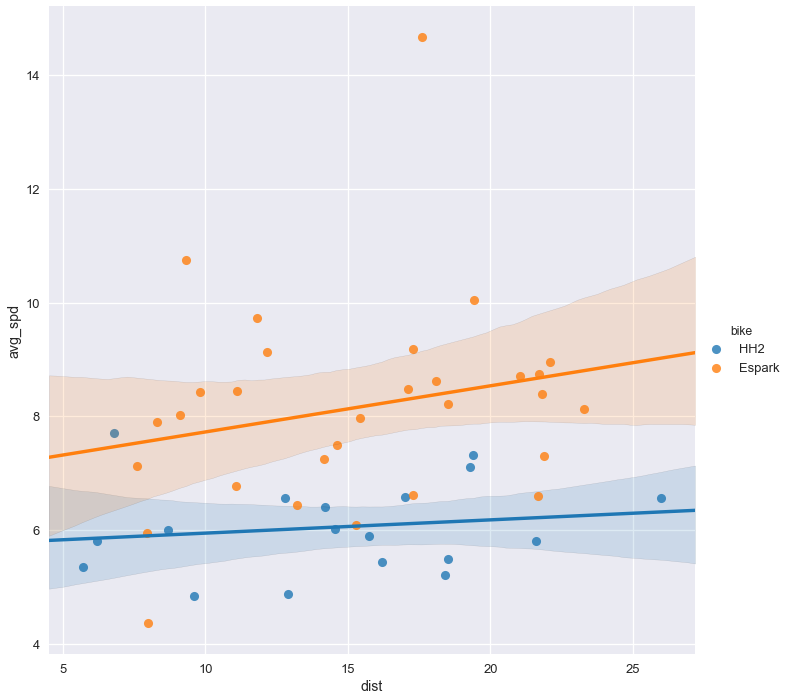

In [80]:
sns.lmplot(x='dist', y='avg_spd', data=mtb, hue='bike', size=10)

A linear model visualization of distance with average speed reinforces the fact that distance is not an effective predictor of average speed

### A hypothesis test will determine if a linear model is appropriate for predicting average speed.

H<sub>0</sub>: There is no relationship between predictor and response variables.  
H<sub>a</sub>: There is a relationship between at least one predictor and the response variable.  
Significance Level: 0.05

In [81]:
from sklearn import feature_selection

In [82]:
feature_selection.f_regression(X = mtb[['dist', 'minutes', 'vft', 'vft_per_mi', 'HH2', 'category_num']], 
                               y = mtb['avg_spd'])

(array([ 1.82452452,  7.13327456,  1.09785763,  0.29505845, 21.35063004,
         1.00619218]),
 array([1.83383144e-01, 1.04259375e-02, 3.00211078e-01, 5.89619726e-01,
        3.10094981e-05, 3.21064437e-01]))

In [83]:
f = feature_selection.f_regression(X = mtb[['minutes', 'HH2']], y = mtb['avg_spd'])

In [84]:
print('Average speed regressed onto minutes: \n', 'F-score:', f[0][0], '\n P-value:', f[1][0])
print('\nAverage speed regressed onto bike selection: \n', 'F-score:', f[0][1], '\n P-value:', f[1][1])

Average speed regressed onto minutes: 
 F-score: 7.1332745581855095 
 P-value: 0.010425937495576004

Average speed regressed onto bike selection: 
 F-score: 21.350630041780366 
 P-value: 3.100949806269183e-05


The hypothesis test indicates that the only two predoictors for which I can reject the null hypothesis are minutes and bike selection. Since minutes cannot be known in advance of a ride, bike is the only valid predictor of average speed. Since bike is a binary predictor variable, the best estimates will simply be the mean average speeds of the rides on that particular bike.

In [85]:
print('Average speed when bike is HH2: \n', round(np.mean(mtb[mtb['bike']=='HH2']['avg_spd']), 2), 'mph')
print('Average speed when bike is Espark: \n', round(np.mean(mtb[mtb['bike']=='Espark']['avg_spd']), 2), 'mph')

Average speed when bike is HH2: 
 6.05 mph
Average speed when bike is Espark: 
 8.15 mph


### A hypothesis test to determine if a linear model is appropriate for predicting ride time (minutes).

H<sub>0</sub>: There is no relationship between predictor and response variables.  
H<sub>a</sub>: There is a relationship between at least one predictor and the response variable.  
Significance Level: 0.05

Let's first return to the correlation heatmap to identify possible predictor variables.

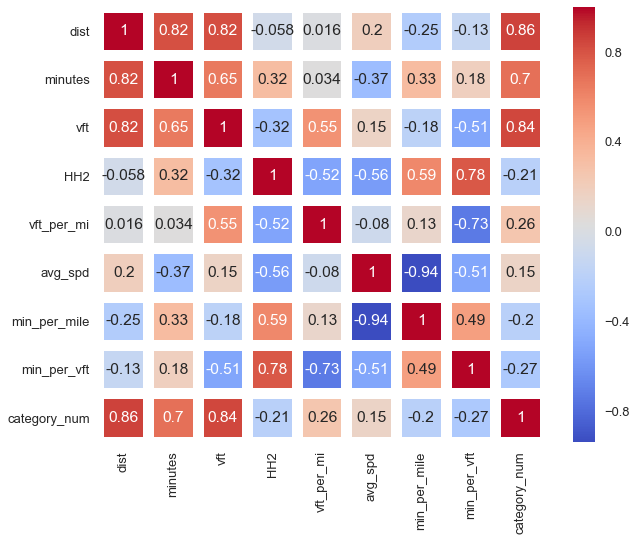

In [86]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(mtb.corr(), cmap='coolwarm', linecolor='white', linewidth=10, annot=True)

In [87]:
feature_selection.f_regression(X = mtb.drop(['minutes', 'category', 'bike', 'min_per_mile'], axis=1), 
                               y = mtb['minutes'])

(array([9.10974761e+01, 3.43217490e+01, 5.32761772e+00, 5.29554015e-02,
        7.13327456e+00, 1.60489974e+00, 4.32401271e+01]),
 array([1.75491351e-12, 4.71729540e-07, 2.55379241e-02, 8.19018511e-01,
        1.04259375e-02, 2.11587107e-01, 3.95295006e-08]))

The following predictor variables have a sigifiance level > 0.05:

dist, vft, HH2, avg_spd, category_num

I will drop avg_spd since it is not knowable in advance and category_num because it is a reformulation of dist and vft.

Let's proceed with a linear model to predict minutes using these predictors: dist, vft, HH2

In [88]:
X = mtb[['dist', 'vft', 'HH2']]
y = mtb['minutes']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
mtb_model = LinearRegression()

In [93]:
mtb_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
predictions = mtb_model.predict(X_test)

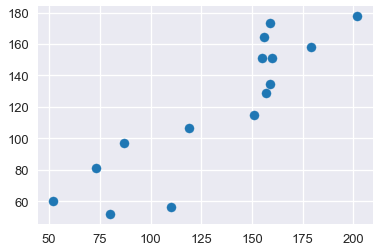

In [95]:
plt.scatter(x=y_test, y=predictions)

In [96]:
from sklearn import metrics

In [97]:
print('r-squared: ', round(metrics.r2_score(y_test, predictions), 4))

r-squared:  0.692


In [98]:
print('MAE: ', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('MSE: ', round(metrics.mean_squared_error(y_test, predictions), 2))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

MAE:  19.37
MSE:  547.79
RMSE:  23.4


In [99]:
coeff_df = pd.DataFrame(mtb_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
dist,6.738830
vft,0.007704
HH2,40.845289


# Conclusion

The multiple linear regression performs reasonably well given the very small data set. Approximately 84% of the variance in ride time can be explained by the linear model, with a root-mean-squared error of about 15.3 minutes. I will continue to add data and revaluate the model. I interpret the linear coefficients as follows:  

Holding all other features fixed:

A 1 mile increase in ride length is associated with an increase of approximately 6.7 minutes.  
A 1000 foot increase in vertical feet is associated with an increase of approximately 7.7 minutes.  
The bike selection HH2 is associated with an increase of approximately 41 minutes.

In [102]:
def ride_time(dist, vft, bike):
    minutes = 0
    minutes += dist * 6.73883
    minutes += vft * 0.007704
    if bike == 'HH2':
        minutes += 40.845289
    return minutes

In [103]:
print('With epsark as the bike, a ride of 18 miles with 3800 feet of climbing will take', 
      (int(ride_time(18, 3800, 'Espark') // 60)), 'hours,', 
      (int(ride_time(18, 3800, 'Espark') % 60)), 'minutes.')

With epsark as the bike, a ride of 18 miles with 3800 feet of climbing will take 2 hours, 30 minutes.
